In [6]:
library(ggplot2)
library(reshape2)
library(smooth)
library(dplyr)
library(TTR)

In [9]:
Data <- read.csv("GenreData.csv")
Data <- Data[2:ncol(Data)]
Data$Year <- substr(Data$Date,1,4)
head(Data)

Date,Blues,Rock,Pop,HipHop,R.B,Country,Folk,Reggae,Electro,Religous,Year
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1958-08-04,13,19,21,2,6,15,3,1,0,0,1958
1958-08-11,13,18,16,2,6,20,3,0,2,0,1958
1958-08-18,15,14,15,1,6,16,2,0,1,0,1958
1958-08-25,13,15,17,2,5,18,2,0,1,0,1958
1958-09-01,11,17,20,2,5,17,2,0,1,0,1958
1958-09-08,12,16,17,2,5,22,2,0,1,0,1958


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula 

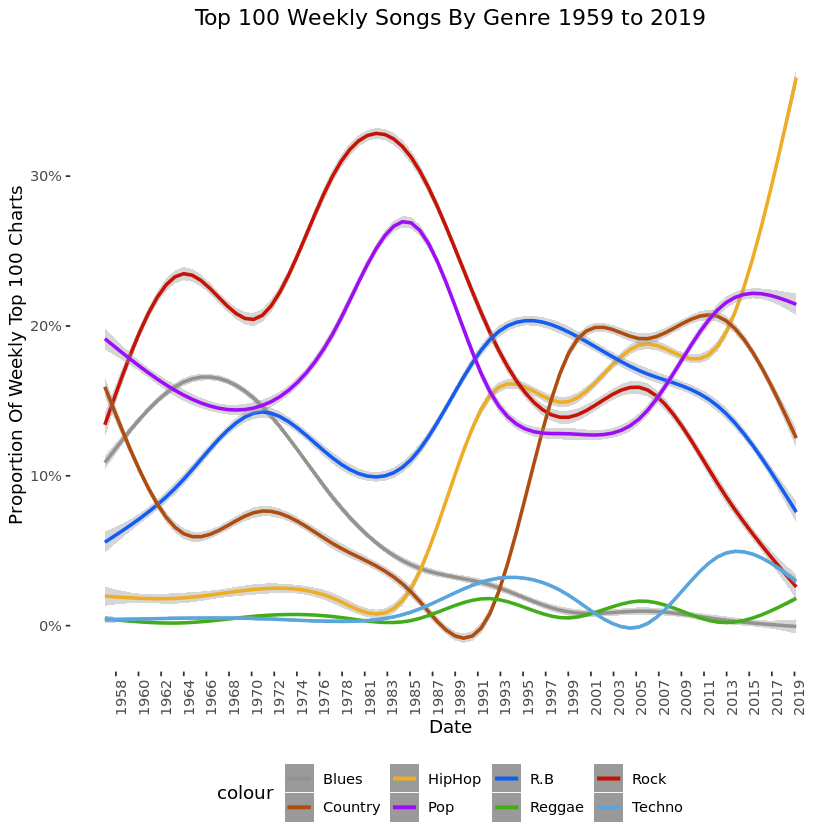

In [41]:
ggplot(Data, aes(x = as.numeric(Date))) + 
geom_smooth(aes(y = Blues, group = 1,color = "Blues")) +
geom_smooth(aes(y = HipHop, group = 2, color = "HipHop")) +
geom_smooth(aes(y = Rock, group = 3, color = "Rock")) +
geom_smooth(aes(y = R.B, group = 4, color = "R.B")) +
geom_smooth(aes(y = Country, group = 5, color = "Country")) +
geom_smooth(aes(y = Reggae, group = 6, color = "Reggae")) +
geom_smooth(aes(y = Electro , group = 7, color = "Techno")) +
geom_smooth(aes(y = Pop, group = 8, color = "Pop")) + 
theme(legend.position="bottom") + 
scale_color_manual(values = c(Blues = "#96928d",
                              HipHop = "#edae25",
                              Rock = "#c61305",
                              R.B = "#135df4",
                              Country = "#af4d11",
                              Reggae = "#42ad1b",
                              Techno = "#58a6dd",
                              Pop = "#9e0cf9")) +
labs(title = "Top 100 Weekly Songs By Genre 1959 to 2019") +
ylab(label = "Proportion Of Weekly Top 100 Charts") +
xlab(label = "Date") +
theme(legend.position="bottom",
  plot.title = element_text(hjust = 0.5),
  panel.background = element_blank(),     
  panel.border = element_blank(),                                           
  panel.grid = element_blank(),         
  panel.grid.major.x = element_blank(), 
  panel.grid.major.y = element_blank(), 
  panel.grid.minor.x = element_blank(), 
  panel.grid.minor.y = element_blank(),
  axis.text.x = element_text(angle = 90, hjust = 1)) + 
scale_x_continuous(breaks = seq(50,length(unique(Data$Date)),100), labels = unique(Data$Year)[seq(1,length(unique(Data$Year)),2)]) +
scale_y_continuous(breaks = c(0,10,20,30,40), labels = c("0%","10%","20%","30%","40%"))
ggsave("Genres/Lines.png")

In [4]:
LongData <- melt(Data[!names(Data) %in% c("Folk","Religous")], measure.vars = c(names(Data)[!names(Data)%in%c("Date","Folk","Religous")]))
names(LongData) <- c("Date","Genre","Count")
head(LongData)
LongData$Genre <- as.character(LongData$Genre)
LongData$Genre[LongData$Genre=="Electro"] <- "Techno"
LongData$Genre <- as.factor(LongData$Genre)

Date,Genre,Count
<fct>,<fct>,<int>
1958-08-04,Blues,13
1958-08-11,Blues,13
1958-08-18,Blues,15
1958-08-25,Blues,13
1958-09-01,Blues,11
1958-09-08,Blues,12


Warning message:
“Removed 432 rows containing missing values (position_stack).”Saving 6.67 x 6.67 in image
Warning message:
“Removed 432 rows containing missing values (position_stack).”

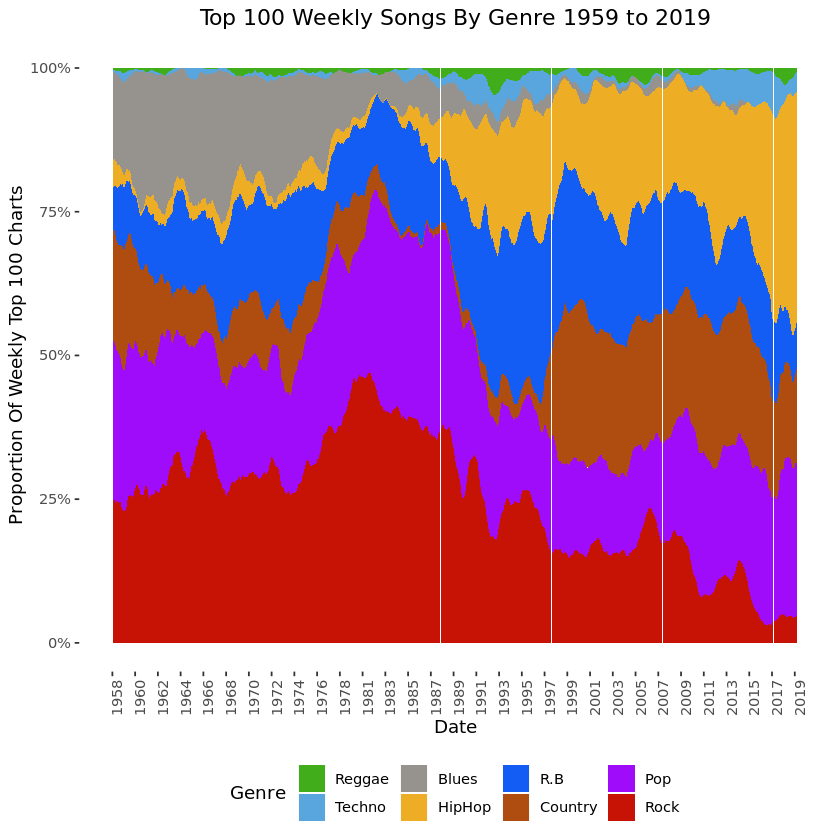

In [43]:
LongDataSmooth <- LongData %>% group_by(Genre) %>% mutate(Smooth = runMean(Count, 55))
LongDataSmooth$Genre <- factor(LongDataSmooth$Genre, levels = c("Reggae",
                                                                "Techno",
                                                                "Blues",
                                                                "HipHop", 
                                                                "R.B",
                                                                "Country",
                                                                "Pop",
                                                                "Rock"))
LongDataSmooth$Year <- substr(LongDataSmooth$Date,1,4)
LongDataSmooth$Date <- as.numeric(LongDataSmooth$Date)
ggplot(LongDataSmooth, aes(x=Date, y=Smooth, fill=Genre)) + 
geom_bar(position="fill", stat="identity", width=1) + 
labs(title = "Top 100 Weekly Songs By Genre 1959 to 2019") +
ylab(label = "Proportion Of Weekly Top 100 Charts")+
xlab(label = "Date")+
theme(legend.position="bottom",
  panel.background = element_blank(),     
  panel.border = element_blank(),                                           
  panel.grid = element_blank(),
  plot.title = element_text(hjust = 0.5),
  panel.grid.major.x = element_blank(), 
  panel.grid.major.y = element_blank(), 
  panel.grid.minor.x = element_blank(), 
  panel.grid.minor.y = element_blank(),
  axis.text.x = element_text(angle = 90, hjust = 0.5)) + 
scale_fill_manual(values = c(Blues = "#96928d",
                              HipHop = "#edae25",
                              Rock = "#c61305",
                              R.B = "#135df4",
                              Country = "#af4d11",
                              Reggae = "#42ad1b",
                              Techno = "#58a6dd",
                              Pop = "#9e0cf9")) +
scale_x_continuous(breaks = seq(50,length(unique(LongDataSmooth$Date)),100), labels = unique(LongDataSmooth$Year)[seq(1,length(unique(LongDataSmooth$Year)),2)]) +
scale_y_continuous(breaks = c(0,0.25,0.5,0.75,1), labels = c("0%","25%","50%","75%","100%"))
ggsave("Genres/Area.png")